In [145]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 18 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['image.cmap'] = 'RdBu_r'

In [5]:
files = os.listdir('./full_data/backstep/') + os.listdir('./partial_data/backstep/')

In [152]:
dirs = ['./full_data/backstep/', './partial_data/backstep/']
train_dict = {}
test_dict = {}
for dir in dirs:
    files = os.listdir(dir)
    for file in files:
        if 'png' in file:
            continue
        if 'train' in file:
            k = file.split('.')[0]
            train_dict[k] = np.load(os.path.join(dir, file))
        elif 'test' in file:
            k = file.split('.')[0]
            test_dict[k] = np.load(os.path.join(dir, file))

In [155]:
train_list = []
for _,val in train_dict.items():
    train_list.append(val)
train_list[0],train_list[2] = train_list[2],train_list[0]
train_list[1],train_list[3] = train_list[3],train_list[1]

train_errors = np.array(train_list)
test_list = []
for _,val in test_dict.items():
    test_list.append(val)
test_list[0],test_list[2] = test_list[2],test_list[0]
test_list[1],test_list[3] = test_list[3],test_list[1]
test_errors = np.array(test_list)

In [158]:
train_dict.keys()

dict_keys(['train_error_no_mu', 'train_error_mu', 'pod_train_error', 'ls_train_error', 'train_error_10', 'train_error_20', 'train_error_50'])

ok


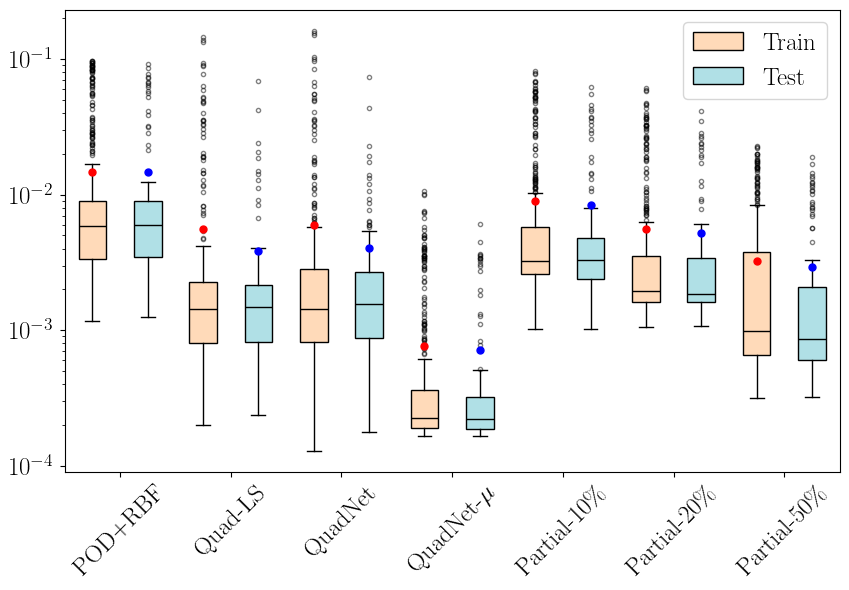

In [157]:
fig,ax = plt.subplots(figsize=(10,6))
pos_train = np.arange(1,14,2)
pos_test = np.arange(2,15,2)
ax.boxplot((train_errors).T,
           positions=pos_train,
           sym='.',
           patch_artist=True,
           boxprops={'facecolor':'peachpuff'},
           medianprops={'color':'k'},
           meanprops={'marker':'o','markerfacecolor':'r','markeredgecolor':'r','ms':5},
           flierprops={'alpha':0.5},
           showmeans=True,
          )

ax.boxplot((test_errors).T,
           positions=pos_test,
           sym='.',
           patch_artist=True,
           boxprops={'facecolor':'powderblue'},
           medianprops={'color':'k'},
           meanprops={'marker':'o','markerfacecolor':'b','markeredgecolor':'b','ms':5},
           flierprops={'alpha':0.5},
           showmeans=True
          )

labels = ['POD+RBF','Quad-LS','QuadNet',r'QuadNet-$\mu$',r'Partial-10\%',r'Partial-20\%',r'Partial-50\%']
ax.set_xticks((pos_test+pos_train)/2,labels,rotation=45)
ax.set_yscale('log')
legend_elements = [
    matplotlib.patches.Patch(facecolor='peachpuff', edgecolor='black', label='Train'),
    matplotlib.patches.Patch(facecolor='powderblue', edgecolor='black', label='Test')
]
ax.legend(handles=legend_elements)
print('ok')

In [160]:
test_errors.mean(axis=-1),test_errors.std(axis=-1)

(array([0.01462543, 0.00383957, 0.00403483, 0.00071246, 0.00837592,
        0.00522166, 0.00293803], dtype=float32),
 array([0.02179939, 0.00869021, 0.00906701, 0.00115389, 0.01248028,
        0.00803629, 0.00429362], dtype=float32))